In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import plotly.graph_objects as go


In [2]:
training_curves = glob.glob('./results/*/*csv')
#training_curves2 = glob.glob('./results-MinMax-Schedule/*/*csv')

In [3]:
dfs = {}
res = {}
for curve in training_curves:#+training_curves2:
    name = curve.split('/')[2]
    f = pd.read_csv(curve).drop('epoch', axis = 1)
    f.index.name = 'epoch'
    dfs[name] = f.reset_index()#.tail(10000)
    res[name] = f.loc[f.val_loss.idxmin()].copy()
    #print(name ,f.val_loss.idxmin())
    res[name]['bst_epoch'] = f.val_loss.idxmin()
    res[name]['max_epoch'] = f.shape[0]

In [4]:
df = pd.DataFrame(res).T.sort_values(by = 'val_loss')
df#.loc[['cycles-exp8-coords4--16_32tanh', 'cycles-exp2-coords4--16_32tanh', 'cycles-exp1-coords4--16_32tanh']	]

,loss,mae,val_loss,val_mae,bst_epoch,max_epoch
cycles-exp4-coords4--16_32tanh,0.002556,0.037293,0.002502,0.034250,999831.0,1000000.0
cycles-exp6-coords4--16_32tanh,0.001792,0.030268,0.002602,0.034520,1631171.0,1645700.0
cycles-exp2-coords4--16_32tanh,0.004237,0.049069,0.004369,0.048054,992995.0,1000000.0
cycles-exp4-coords2--16_32tanh,0.005549,0.057316,0.006838,0.062098,3974665.0,4000000.0
cycles-exp4-coords3--16_32tanh,0.005784,0.057139,0.007150,0.061740,992579.0,1000000.0
cycles-exp2-coords3--16_32tanh,0.006815,0.061458,0.007614,0.063660,998850.0,1000000.0
cycles-exp2-coords2--16_32tanh,0.007290,0.064881,0.008143,0.067879,989308.0,1000000.0
cycles-exp6-coords3--16_32tanh,0.005677,0.057059,0.010038,0.072257,995934.0,1000000.0
cycles-exp6-coords2--16_32tanh,0.007692,0.066885,0.011454,0.078864,996157.0,1000000.0
cycles-exp4-coords1--16_32tanh,0.023707,0.106969,0.028849,0.115881,898713.0,900000.0


In [5]:
pal = sns.color_palette("Paired")


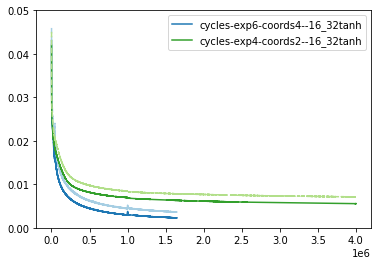

In [6]:
fig, axs = plt.subplots(ncols = 1, nrows = 1)

models_to_plot = ['cycles-exp6-coords4--16_32tanh', 'cycles-exp4-coords2--16_32tanh']#, 'cycles-exp4-coords4--16_32tanh']

rolling = [True, 1000]

k = 0
for i in models_to_plot:
    df_loss = dfs[i]['loss'].copy()
    df_val_loss = dfs[i]['val_loss'].copy()
    if rolling[0]:
        df_loss = df_loss.rolling(rolling[1]).mean().dropna()
        df_val_loss = df_val_loss.rolling(rolling[1]).mean().dropna()

    axs.plot(df_loss,color = pal[k+1], label = i)
    axs.plot(df_val_loss,color = pal[k], linestyle = '--')
    k = k + 2

plt.ylim([0.0, 0.05])
#plt.xlim([0, 500_000])

axs.legend()
fig.show()

In [ ]:
#fig = go.Figure()
#
#models_to_plot = ['cycles-exp6-coords4--16_32tanh']
#
#losses = []
#val_losses = []
#for i in models_to_plot:
#    losses.append(go.Scatter(y = dfs[i]['loss'].rolling(1000).mean().dropna(), name = i+' loss'))
#    val_losses.append(go.Scatter(y = dfs[i]['val_loss'], name = i+' val loss'))
#
#
#fig.add_traces([*losses, *val_losses])
#fig.show()